In [1]:

folderNicoMac = '/Users/piromast/Dropbox/S2DS - M&S/Data'
filename='sentiment_client_agent.csv'

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt
import seaborn
from scipy.signal import correlate

/Users/piromast/anaconda/envs/MandS_P2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
df=pd.read_csv(os.path.join(folderNicoMac,filename))

In [4]:
sentAgentSplit=df.groupby(['convLen','convID'])

In [24]:
LongestConvLeng = max(df['convLen'])
MaxConvLength = 20
corr = []
meanCorr = []
meanAgentStd = []
meanClientStd = []
numConv = []
for leng, group in df.groupby(['convLen']):
    listOfCrossCorrelations = []
    listOfAgentStd = []
    listOfClientStd = []
    n = 0.0
    for convid, conv in group.groupby(['convID']):
        AgSent = conv['agent'].values
        ClSent = conv['client'].values
        AgMean = np.mean(AgSent)
        ClMean = np.mean(ClSent)
        AgStd = np.std(AgSent)
        ClStd = np.std(ClSent)
        listOfCrossCorrelations.append(correlate(ClSent-ClMean,AgSent-AgMean))
        listOfAgentStd.append(AgStd)
        listOfClientStd.append(ClStd)
        n += 1.0
    
    corr.append(np.array(listOfCrossCorrelations))
    numConv.append(n)
    meanCorr.append(np.mean(corr[-1],axis=0))
    
    meanCorr[-1]=np.pad(meanCorr[-1],LongestConvLeng/2,mode='constant',constant_values=(np.nan,))
    #meanCorr[-1]=meanCorr[-1]/np.nanmax(meanCorr[-1])
weigths = np.array(numConv)/sum(numConv)  # Weight for overall average

In [25]:
meanCorr[0]

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,   0.,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])

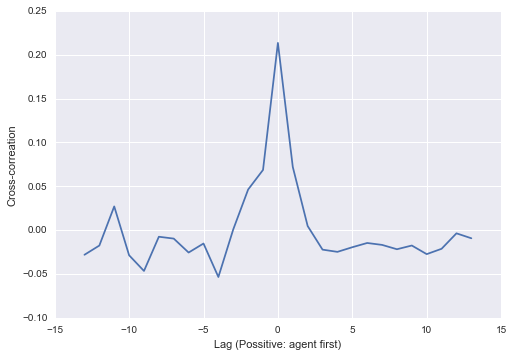

In [27]:
for n in range(13,14):
    plt.plot(np.arange(-n,n+1,1.0),meanCorr[n][~np.isnan(meanCorr[n])])
    plt.hold('on')
    plt.xlabel('Lag (Possitive: agent first)')
    plt.ylabel('Cross-correation')

In [21]:
ClStd

0.30479266375836078

In [106]:
[-1:1:1]

SyntaxError: invalid syntax (<ipython-input-106-43bbdabd5a4e>, line 1)

In [72]:
weigths = np.array(numConv)/sum(np.array(numConv)) 

AttributeError: 'numpy.ndarray' object has no attribute 'float'

In [70]:
 np.array(numConv)

array([5549, 8133, 9106, 8039, 6373, 4456, 3089, 2053, 1363,  992,  619,
        380,  279,  183,  143,   96,   61,   42,   44,   26,   19,   16,
         15,    4,    6,    4,    4,    1,    3,    1,    3,    2,    1,
          1,    3,    1,    1,    1])

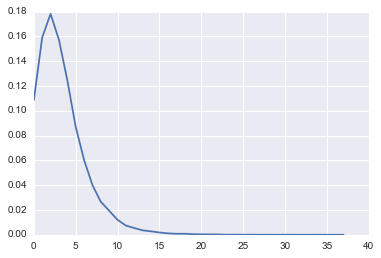

In [84]:
plt.plot(weigths)

In [115]:
meanCorr[0].size

53

In [117]:
meanCorr[n][~np.isnan(meanCorr[n])]

array([ 0.12084209,  0.25872745,  0.08519381])

In [118]:
np.linspace(-n,n,1.0)

array([-1.])

In [123]:
np.arange(-n,n+1,1.0)

array([-1.,  0.,  1.])